<style>
    h1 {
        padding: 8px 8px;
        background-image: linear-gradient(135deg, #c9f3ff, rgb(131, 218, 255));
        font-weight: 700;
        position: static;
        text-align: center;
        color: #006098;
        font-size: 36px;
    }
    h2 {
        font-weight: 700;
        text-align: center;
        font-style: italic;
        font-size: 24px;
    }
</style>

<div><h1>THỐNG KÊ MÁY TÍNH VÀ ỨNG DỤNG</h1></div>
<div><h2>Bài tập 01</h2></div>

**THÔNG TIN CÁ NHÂN**

- _Họ tên sinh viên:_ **Nguyễn Đặng Đăng Khoa**

- _Mã số sinh viên:_ **21120179**

**KHAI BÁO THƯ VIỆN**

In [1]:
import numpy as np
import numpy.matlib as npm
import pandas as pd
import math
import random as rd
import collections as clt
import statistics as sts

import matplotlib.pyplot as plt
import seaborn as sns

# **CÂU 1**
Chơi trò Tôm Cua (https://vi.wikipedia.org/wiki/L%E1%BA%AFc_b%E1%BA%A7u_cua). Người chơi có $6$ tờ $1\$$ và muốn đặt tất cả $6$ tờ này một lần. Phân tích các cách đặt (như đặt cả $6$ tờ vào mặt Tôm, hay $5$ tờ mặt Tôm và $1$ tờ mặt Cua...) để chọn ra cách đặt tốt nhất cho người chơi. Có nên chơi trò này không?

**_Lý thuyết_**

Giả sử, trò chơi Tôm Cua gồm có 6 ô hình sau: Bầu, Cua, Tôm, Cá, Gà, Nai.

Với người chơi có $6$ tờ tiền mệnh giá $1\$$ và muốn đặt tất cả $6$ tờ tiền vào một lần chơi, ta có **$11$** cách đặt như sau:
- TH1: Đặt $6$ tờ tiền vào cùng $1$ ô hình.
- TH2: Đặt $6$ tờ tiền vào $2$ ô hình khác nhau từng đôi với tỷ lệ $5-1$.
- TH3: Đặt $6$ tờ tiền vào $2$ ô hình khác nhau từng đôi với tỷ lệ $4-2$.
- TH4: Đặt $6$ tờ tiền vào $3$ ô hình khác nhau từng đôi với tỷ lệ $4-1-1$.
- TH5: Đặt $6$ tờ tiền vào $2$ ô hình khác nhau từng đôi với tỷ lệ $3-3$.
- TH6: Đặt $6$ tờ tiền vào $3$ ô hình khác nhau từng đôi với tỷ lệ $3-2-1$.
- TH7: Đặt $6$ tờ tiền vào $4$ ô hình khác nhau từng đôi với tỷ lệ $3-1-1-1$.
- TH8: Đặt $6$ tờ tiền vào $3$ ô hình khác nhau từng đôi với tỷ lệ $2-2-2$.
- TH9: Đặt $6$ tờ tiền vào $4$ ô hình khác nhau từng đôi với tỷ lệ $2-2-1-1$.
- TH10: Đặt $6$ tờ tiền vào $5$ ô hình khác nhau từng đôi với tỷ lệ $2-1-1-1-1$.
- TH11: Đặt $6$ tờ tiền vào $6$ ô hình khác nhau từng đôi với tỷ lệ $1-1-1-1-1-1$.


**_Mô phỏng_**

- Mô phỏng xúc xắc và các trường hợp.

In [2]:
# Các ô hình trò chơi
dice = ['Bầu', 'Cua', 'Tôm', 'Cá', 'Gà', 'Nai']

# Các trường hợp đặt cược
case_lst = [[6],
            [5, 1],
            [4, 2], [4, 1, 1],
            [3, 3], [3, 2, 1], [3, 1, 1, 1],
            [2, 2, 2], [2, 2, 1, 1], [2, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1]]

# Số lần mô phỏng
N = 100_000

- Mô phỏng đổ xúc xắc và đặt cược.

In [3]:
def shake_dices(lst:list=dice, num_dices:np.uint8=3) -> list:
    return np.random.choice(lst, num_dices)

def place_bets(case_:list, lst:list=dice) -> list:
    if len(case_) <= len(lst):
        return rd.sample(lst, len(case_))
    return []

- Mô phỏng kiểm tra kết quả đặt cược

In [4]:
# Kiểm tra kết quả đặt cược
def check_result(bet_case:list, lst:list=dice) -> int:
    dices = shake_dices(lst=lst)
    count_dict = clt.Counter(dices)
    way = place_bets(bet_case)
    count_list = np.array([count_dict.get(ele_way, 0) for ele_way in way])
    appearance = (count_list > 0)*1
    return np.dot(bet_case, np.add(count_list, appearance)) - sum(bet_case)

- Thực hiện mô phỏng $1,000,000$ lần chơi.

In [5]:
def simulate(bet_case:list, num_simulation:np.uint64=N, lst:list=dice) -> list:
    record_lst = np.array([check_result(bet_case, lst=lst) for _ in range(num_simulation)])
    win_raito = float("{:.3f}".format((record_lst > 0).mean()))
    prize = sts.mode(record_lst[(record_lst > 0)]) if win_raito > 0.0 else 0
    lose_raito = float("{:.3f}".format((record_lst < 0).mean()))
    penalty = sts.mode(record_lst[(record_lst < 0)]) if lose_raito > 0.0 else 0
    draw_raito = float("{:.3f}".format(1.0 - win_raito - lose_raito))
    return [win_raito, draw_raito, lose_raito, prize, penalty * (-1)]

In [6]:
record_df = pd.DataFrame([simulate(case_) for case_ in case_lst],
                          columns=['Thắng', 'Hòa', 'Thua', 'Số tiền lời', 'Số tiền lỗ'],
                          index=['-'.join(map(str, case_)) for case_ in case_lst])

record_df

,Thắng,Hòa,Thua,Số tiền lời,Số tiền lỗ
6,0.421,0.000,0.579,6,6
5-1,0.422,0.000,0.578,4,6
4-2,0.426,0.056,0.518,2,6
4-1-1,0.421,0.000,0.579,4,4
3-3,0.259,0.444,0.297,6,6
3-2-1,0.329,0.249,0.422,2,2
3-1-1-1,0.365,0.084,0.551,2,2
2-2-2,0.374,0.126,0.500,2,2
2-2-1-1,0.315,0.278,0.407,2,2
2-1-1-1-1,0.282,0.237,0.481,2,2


In [7]:
record_df['Số tiền lỗ'] = record_df['Số tiền lỗ'] * (-1)

In [8]:
record_df

,Thắng,Hòa,Thua,Số tiền lời,Số tiền lỗ
6,0.421,0.000,0.579,6,-6
5-1,0.422,0.000,0.578,4,-6
4-2,0.426,0.056,0.518,2,-6
4-1-1,0.421,0.000,0.579,4,-4
3-3,0.259,0.444,0.297,6,-6
3-2-1,0.329,0.249,0.422,2,-2
3-1-1-1,0.365,0.084,0.551,2,-2
2-2-2,0.374,0.126,0.500,2,-2
2-2-1-1,0.315,0.278,0.407,2,-2
2-1-1-1-1,0.282,0.237,0.481,2,-2


In [25]:
print('Kỳ vọng:',np.median(record_df[['Số tiền lời', 'Số tiền lỗ']]))
print('Kỳ vọng:',pd.Series(record_df[['Số tiền lời', 'Số tiền lỗ']].to_numpy().reshape(-1)).describe().loc['50%'])

Kỳ vọng: -0.5
Kỳ vọng: -0.5


In [ ]:
np.multiply

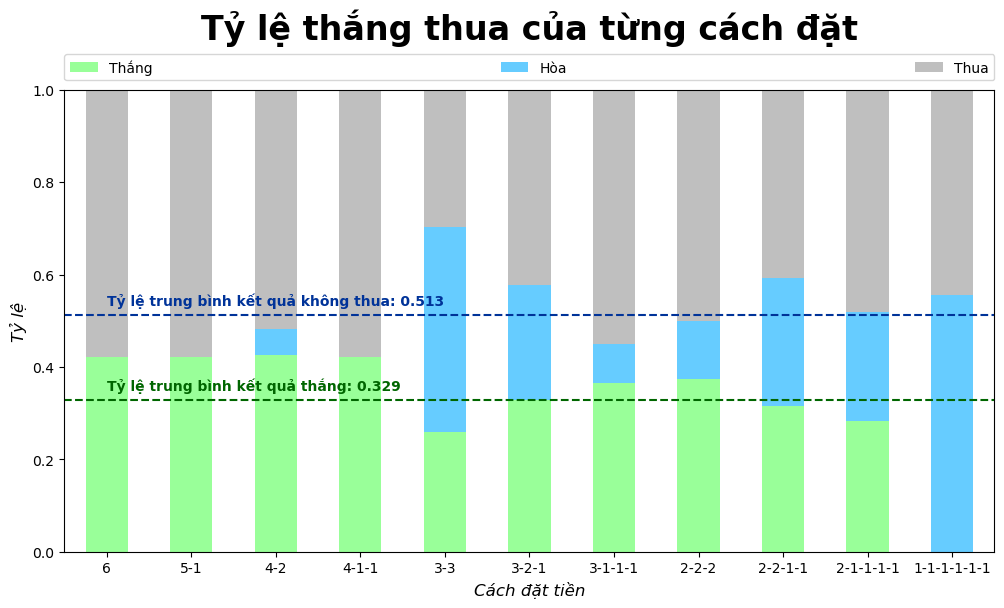

In [10]:
record_df[['Thắng', 'Hòa', 'Thua']].plot(kind='bar', stacked=True, color=['#99FF99', '#66CCFF', '#BFBFBF'], figsize=(12, 6), ylim=[0, 1]);
plt.title('Tỷ lệ thắng thua của từng cách đặt', {'weight': 'bold', 'size': 24}, 'center', 36);
plt.xticks(rotation=0);
plt.xlabel('Cách đặt tiền', {'style': 'italic', 'size': 12})
plt.ylabel('Tỷ lệ', {'style': 'italic', 'size': 12})
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=3);

not_lose_raito = 1 - record_df['Thua'].mean()
win_raito = record_df['Thắng'].mean()
plt.axhline(y=win_raito, linestyle='--', color='#006600');
plt.annotate("Tỷ lệ trung bình kết quả thắng: {:.3f}".format(win_raito), xy=(0, win_raito), xytext=(0, win_raito+0.02), color='#006600', weight='bold');
plt.axhline(y=not_lose_raito, linestyle='--', color='#003399');
plt.annotate("Tỷ lệ trung bình kết quả không thua: {:.3f}".format(not_lose_raito), xy=(0, not_lose_raito), xytext=(0, not_lose_raito+0.02), color='#003399', weight='bold');

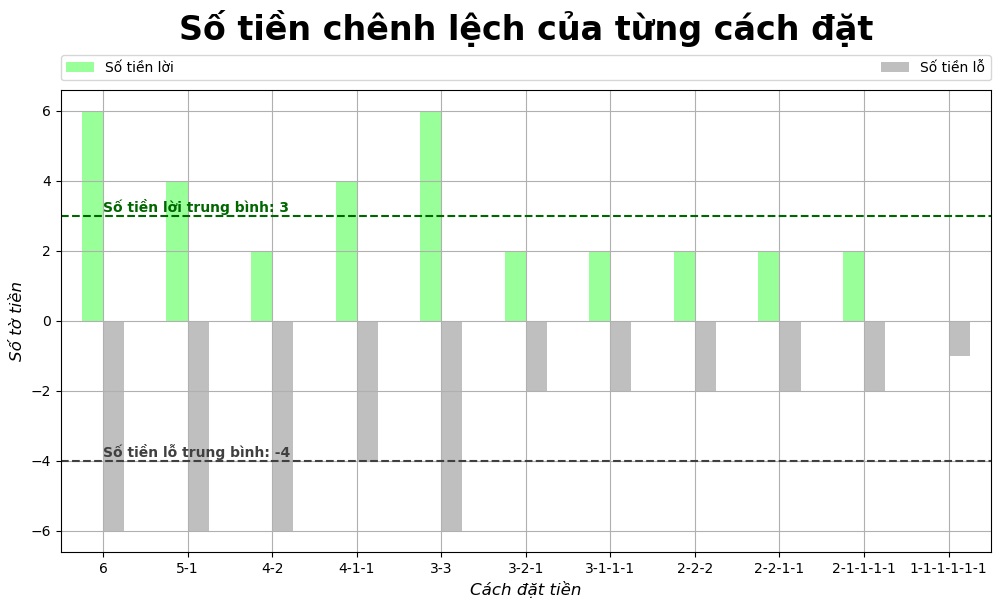

In [11]:
record_df[['Số tiền lời', 'Số tiền lỗ']].plot(kind='bar', color=['#99FF99', '#BFBFBF'], figsize=(12, 6));
plt.title('Số tiền chênh lệch của từng cách đặt', {'weight': 'bold', 'size': 24}, 'center', 36);
plt.xticks(rotation=0);
plt.xlabel('Cách đặt tiền', {'style': 'italic', 'size': 12})
plt.ylabel('Số tờ tiền', {'style': 'italic', 'size': 12})
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=3);

prize = round(record_df['Số tiền lời'].mean())
penalty = round(record_df['Số tiền lỗ'].mean())
plt.axhline(y=prize, linestyle='--', color='#006600');
plt.annotate("Số tiền lời trung bình: %d" % prize, xy=(0, prize), xytext=(0, prize+0.1), color='#006600', weight='bold');
plt.axhline(y=penalty, linestyle='--', color='#404040');
plt.annotate("Số tiền lỗ trung bình: %d" % penalty, xy=(0, penalty), xytext=(0, penalty+0.1), color='#404040', weight='bold');
plt.grid()